In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress


In [2]:
# Read raw csv file and view it.
listing_data = pd.read_csv("clean_data_rs/airbnbFINAL_Swobabika.csv", low_memory=False, encoding="UTF-8")
listing_data

,id,host_id,host_name,host_is_superhost,host_total_listings_count,street,neighbourhood_cleansed,city,state,zipcode,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,distance_from_cbd
0,12936,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,15,94,9,10,94,9,9,9,0.15,5.205174
1,47100,212071,Loren,t,4,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,176,98,10,10,98,10,10,10,1.75,3.649571
2,50492,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,44,97,10,10,97,10,9,10,0.60,5.437003
3,51592,190879,Michelle,t,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,196,99,10,9,99,10,10,10,2.07,0.072335
4,66754,50121,Frank & Vince,t,17,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,43,95,9,10,95,10,10,9,0.46,2.794548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,30410904,127327853,Nathan,f,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,2,100,10,10,100,10,10,10,2.00,0.700146
9304,30468406,30322920,Robyn,f,1,"Brunswick West, VIC, Australia",Moreland,Brunswick West,Vic,3055,...,1,0,0,0,0,0,0,0,1.00,5.893982
9305,30470482,36410227,Sabrina,f,276,"Port Melbourne, Australia",Port Phillip,Port Melbourne,Vic,3207,...,1,0,0,0,0,0,0,0,1.00,3.780995
9306,30483362,154023219,Aishah,f,1,"Preston, VIC, Australia",Darebin,Preston,Vic,3072,...,1,0,0,0,0,0,0,0,1.00,8.746854


### Basic clean up and filtering of relevant Data.

In [3]:
# Get the column names so that necessary column names can be extracted.
listing_data.columns

Index(['id', 'host_id', 'host_name', 'host_is_superhost',
       'host_total_listings_count', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'latitude', 'longitude', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'distance_from_cbd'],
      dtype='object')

In [4]:
# Get the data with relevant columns into a new dataframe and view it.
price_airbnb_data = listing_data[["city","property_type","accommodates","price"]]
price_airbnb_data

,city,property_type,accommodates,price
0,St Kilda,Apartment,3,159.0
1,Richmond,Apartment,2,98.0
2,St Kilda,Apartment,4,190.0
3,Melbourne,Loft,4,228.0
4,Richmond,Apartment,4,138.0
...,...,...,...,...
9303,Melbourne,Apartment,5,156.0
9304,Brunswick West,House,6,199.0
9305,Port Melbourne,Apartment,4,140.0
9306,Preston,Apartment,2,71.0


In [5]:
# Rename columns for better readability
price_data_renamed=price_airbnb_data.rename(columns={"city":"Suburbs", 
                                                     "price":"Price/Day($)" })
price_data_renamed

,Suburbs,property_type,accommodates,Price/Day($)
0,St Kilda,Apartment,3,159.0
1,Richmond,Apartment,2,98.0
2,St Kilda,Apartment,4,190.0
3,Melbourne,Loft,4,228.0
4,Richmond,Apartment,4,138.0
...,...,...,...,...
9303,Melbourne,Apartment,5,156.0
9304,Brunswick West,House,6,199.0
9305,Port Melbourne,Apartment,4,140.0
9306,Preston,Apartment,2,71.0


In [6]:
# check datatype to make sure price columns are numerical
price_data_renamed.dtypes

Suburbs           object
property_type     object
accommodates       int64
Price/Day($)     float64
dtype: object

In [7]:
# Convert Price/Day Column to integer type
price_data_renamed["Price/Day($)"] = price_data_renamed["Price/Day($)"].astype('int64')
price_data_renamed.dtypes

Suburbs          object
property_type    object
accommodates      int64
Price/Day($)      int64
dtype: object

In [8]:
# To check for split up of datatypes within the same column
price_data_renamed['Price/Day($)'].apply(type).value_counts()

<class 'int'>    9308
Name: Price/Day($), dtype: int64

In [9]:
# Convert all currency columns to numeric data type.
#price_data_renamed[['Price/Day($)','security_deposit ($)','cleaning_fee($)']] = price_data_renamed[['Price/Day($)','security_deposit ($)','cleaning_fee($)']].replace({'\$': '', ',': ''}, regex=True).astype(float)
#price_data_renamed.dtypes

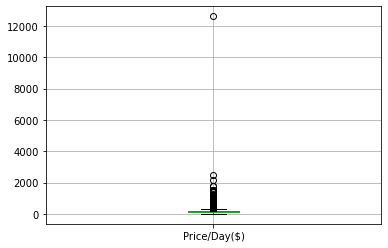

In [10]:
# Check via box and whisker plot if there are extreme values in the dataset.
price_data_renamed.boxplot(column='Price/Day($)', return_type='axes')

In [11]:
# Making sure unique values show extreme values
c=price_data_renamed['Price/Day($)'].unique()
c.sort()
print(c)

[    0    12    30    39    40    46    47    48    50    53    54    55
    57    58    60    61    62    64    65    66    68    69    71    72
    73    75    76    78    79    80    82    83    84    86    87    89
    90    91    93    94    96    97    98   100   101   102   104   105
   107   108   109   111   112   114   115   116   118   119   120   121
   122   123   125   126   127   129   130   132   133   134   136   137
   138   140   141   143   144   145   147   148   150   151   152   154
   155   156   158   159   161   162   163   165   166   168   169   170
   172   173   174   176   177   179   180   181   183   184   186   187
   188   190   191   192   194   195   197   198   199   202   203   205
   206   208   209   210   212   213   215   216   217   219   220   221
   224   226   227   228   230   233   234   235   237   238   239   241
   242   244   245   246   248   249   251   255   256   257   259   260
   262   264   266   269   270   271   275   277   

In [12]:
# Clean price data for extreme values i.e. rows with values=0 and <2500 price/day values.
price_data_cleaned = price_data_renamed.loc[(price_data_renamed["Price/Day($)"] > 0) &
                                            (price_data_renamed["Price/Day($)"] < 2500)]
len(price_data_cleaned)

9304

In [13]:
# Making sure extereme values are removed from dataset.
b= price_data_cleaned['Price/Day($)'].unique()
b.sort()
print(b)

[  12   30   39   40   46   47   48   50   53   54   55   57   58   60
   61   62   64   65   66   68   69   71   72   73   75   76   78   79
   80   82   83   84   86   87   89   90   91   93   94   96   97   98
  100  101  102  104  105  107  108  109  111  112  114  115  116  118
  119  120  121  122  123  125  126  127  129  130  132  133  134  136
  137  138  140  141  143  144  145  147  148  150  151  152  154  155
  156  158  159  161  162  163  165  166  168  169  170  172  173  174
  176  177  179  180  181  183  184  186  187  188  190  191  192  194
  195  197  198  199  202  203  205  206  208  209  210  212  213  215
  216  217  219  220  221  224  226  227  228  230  233  234  235  237
  238  239  241  242  244  245  246  248  249  251  255  256  257  259
  260  262  264  266  269  270  271  275  277  278  280  285  287  288
  289  291  293  295  296  298  299  300  302  305  307  309  310  316
  317  318  320  321  323  324  325  327  329  332  334  335  336  338
  339 

##  Suburb Analysis. 

In [14]:
# Check if entire row is the same datatype.
price_data_cleaned['Suburbs'].apply(type).value_counts()

<class 'str'>    9304
Name: Suburbs, dtype: int64

In [15]:
suburb_names = price_data_cleaned['Suburbs'].unique()
print(suburb_names)
print(len(suburb_names))

['St Kilda' 'Richmond' 'Melbourne' 'Fitzroy' 'Thornbury' 'Clifton Hill'
 'St Kilda East' 'Yarraville' 'Ivanhoe' 'Elwood' 'Middle Park'
 'North Melbourne' 'Caulfield North' 'Collingwood' 'Southbank'
 'South Yarra' 'Windsor' 'Abbotsford' 'East Melbourne' 'Balaclava'
 'Brunswick' 'Caulfield' 'Elsternwick' 'Flemington' 'Hawthorn East'
 'South Melbourne' 'Port Melbourne' 'Maidstone' 'Brighton'
 'Caulfield South' 'St Kilda West' 'Brunswick East' 'Carlton' 'Seddon'
 'Burnley' 'Fairfield' 'Northcote' 'Fitzroy North' 'Kew' 'Toorak'
 'Glen Iris' 'Travancore' 'Gardenvale' 'Heidelberg Heights' 'Prahran'
 'Coburg' 'Parkville' 'Docklands' 'Pascoe Vale South' 'Cremorne'
 'Heidelberg' 'Maribyrnong' 'Moonee Ponds' 'Footscray' 'Brunswick West'
 'Malvern East' 'West Melbourne' 'Alphington' 'Kensington' 'Albert Park'
 'West Footscray' 'Brighton East' 'Kew East' 'Camberwell' 'Hawthorn'
 'Reservoir' 'Preston' 'Princes Hill' 'North Fitzroy' 'Williamstown'
 'Ascot Vale' 'Coburg North' 'Eaglemont' 'Armadale' '

In [16]:
price_data_cleaned

,Suburbs,property_type,accommodates,Price/Day($)
0,St Kilda,Apartment,3,159
1,Richmond,Apartment,2,98
2,St Kilda,Apartment,4,190
3,Melbourne,Loft,4,228
4,Richmond,Apartment,4,138
...,...,...,...,...
9303,Melbourne,Apartment,5,156
9304,Brunswick West,House,6,199
9305,Port Melbourne,Apartment,4,140
9306,Preston,Apartment,2,71


In [17]:
# Create a new column for price/day/person and fill calculated values
price_per_person = round((price_data_cleaned['Price/Day($)']/price_data_cleaned['accommodates']),2)
price_data_cleaned['Price/Day/Person($)'] = price_per_person
price_data_cleaned

C:\Users\Rajeeb\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
0,St Kilda,Apartment,3,159,53.00
1,Richmond,Apartment,2,98,49.00
2,St Kilda,Apartment,4,190,47.50
3,Melbourne,Loft,4,228,57.00
4,Richmond,Apartment,4,138,34.50
...,...,...,...,...,...
9303,Melbourne,Apartment,5,156,31.20
9304,Brunswick West,House,6,199,33.17
9305,Port Melbourne,Apartment,4,140,35.00
9306,Preston,Apartment,2,71,35.50


In [18]:
# Get all unique property types.
unique_property = price_data_cleaned['property_type'].value_counts()
print(unique_property)

Apartment             7391
House                 1131
Townhouse              377
Serviced apartment     280
Loft                   125
Name: property_type, dtype: int64


In [19]:
# Limiting suburb analysis to only entire apartments.
only_apartment = price_data_cleaned.loc[(price_data_cleaned["property_type"]=="Apartment"),:]
only_apartment

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
0,St Kilda,Apartment,3,159,53.00
1,Richmond,Apartment,2,98,49.00
2,St Kilda,Apartment,4,190,47.50
4,Richmond,Apartment,4,138,34.50
7,Clifton Hill,Apartment,4,180,45.00
...,...,...,...,...,...
9301,Melbourne,Apartment,2,134,67.00
9302,Melbourne,Apartment,3,112,37.33
9303,Melbourne,Apartment,5,156,31.20
9305,Port Melbourne,Apartment,4,140,35.00


In [20]:
# Create a new column for price/day/person and fill calculated values
#price_per_person = round((only_apartment['Price/Day($)']/only_apartment['accommodates']),2)
#only_apartment['Price/Day/Person($)'] = price_per_person
#only_apartment


In [21]:
# Check the distribution of data for no. of people an apartment can accomodate
#unique_accomodates = only_apartment['accommodates'].value_counts()
#print(unique_accomodates)

In [22]:
# Limit analysis to apartments that can accomodate smaller groups i.e. 2-6 people. Check no.of datapoints after.
#apartment_accomodate = only_apartment.loc[(only_apartment["accommodates"] >= 2) & (only_apartment["accommodates"] <= 6)]
#print(apartment_accomodate.head())
#print(len(apartment_accomodate))

### Analyse price data distribution with Price/Day Column

In [23]:
# check if price/day data is normally distributed
#plt.hist(price_data_renamed['Price/Day($)'])
normal_test = sts.normaltest(only_apartment['Price/Day($)'].sample(70))
normal_test

NormaltestResult(statistic=77.61714038554688, pvalue=1.3984666524175488e-17)

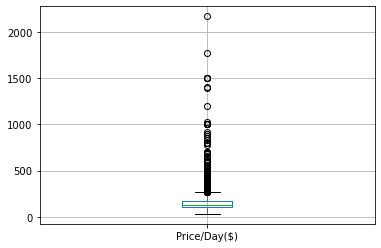

In [24]:
only_apartment.boxplot(column='Price/Day($)', return_type='axes')

In [25]:
prices = only_apartment['Price/Day($)']
quartiles = prices.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price/day for entire apartments is: {lowerq}")
print(f"The upper quartile of price/day for entire apartment is: {upperq}")
print(f"The interquartile range of price/day for entire apartment is: {iqr}")
print(f"The the median of price/days for entire apartment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price/day for entire apartments is: 105.0
The upper quartile of price/day for entire apartment is: 169.0
The interquartile range of price/day for entire apartment is: 64.0
The the median of price/days for entire apartment is: 130.0 
Values below 9.0 could be outliers.
Values above 265.0 could be outliers.


In [26]:
# If we filter data to exclude all outlier bounds as per calculated data, we are only left with 345 data points. 
# This is because different property types will have different price ranges.  
outlier_filtered = only_apartment.loc[(only_apartment['Price/Day($)'] > lower_bound)
                                        &(only_apartment['Price/Day($)'] < upper_bound)]
len(outlier_filtered)

6929

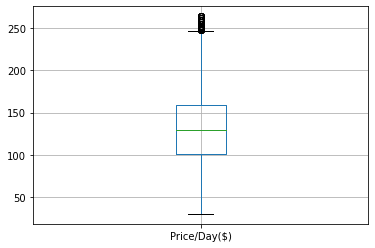

In [27]:
# Create box and whisker plot to check if data is rid of ouliers.
outlier_filtered.boxplot(column='Price/Day($)', return_type='axes')

### Analyse price data distribution with Price/Day/Person Column

In [28]:
# check if price/day data is normally distributed
#plt.hist(price_data_renamed['Price/Day($)'])
normal_test = sts.normaltest(only_apartment['Price/Day/Person($)'].sample(70))
normal_test

NormaltestResult(statistic=32.560647154741275, pvalue=8.502473886163182e-08)

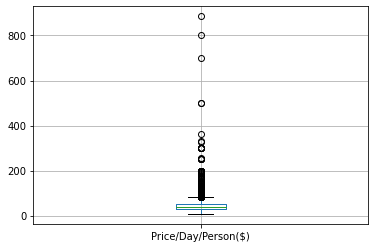

In [29]:
only_apartment.boxplot(column='Price/Day/Person($)', return_type='axes')

In [30]:
prices2=only_apartment['Price/Day/Person($)']
quartiles = prices2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price/day for entire apartments is: {lowerq}")
print(f"The upper quartile of price/day for entire apartment is: {upperq}")
print(f"The interquartile range of price/day for entire apartment is: {iqr}")
print(f"The the median of price/days for entire apartment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price/day for entire apartments is: 29.75
The upper quartile of price/day for entire apartment is: 50.5
The interquartile range of price/day for entire apartment is: 20.75
The the median of price/days for entire apartment is: 38.4 
Values below -1.375 could be outliers.
Values above 81.625 could be outliers.


In [31]:
# If we filter data to exclude all outlier bounds as per calculated data, we are only left with 345 data points. 
# This is because different property types will have different price ranges.  
outlier_filtered2 = only_apartment.loc[(only_apartment['Price/Day/Person($)'] > lower_bound)
                                        &(only_apartment['Price/Day/Person($)'] < upper_bound)]
len(outlier_filtered2)

7025

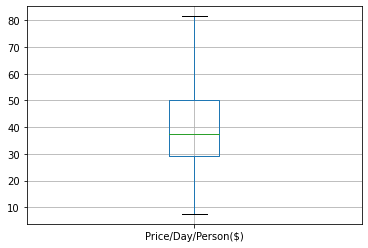

In [32]:
# Create box and whisker plot to check if data is rid of ouliers.
outlier_filtered2.boxplot(column='Price/Day/Person($)', return_type='axes')

### TOP 10 Suburbs

In [33]:
# Grouping apartments accomodating small groupsizes of 2-6 based on suburbs, find average price/day and get top 10 suburbs.
grouped_top = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].mean().sort_values().tail(10)
grouped_top

Suburbs
Braybrook               46.670000
å¢¨çˆ¾æœ¬ Melbourne     46.670000
Moonee Ponds            49.572500
City of Port Phillip    49.830000
Port Phillip City       50.000000
Albert Park             50.615385
Fitzroy                 50.746160
Ivanhoe East            52.500000
Pascoe Vale South       57.500000
South Kingsville        72.500000
Name: Price/Day/Person($), dtype: float64

In [34]:
grouped_top_median = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].median().sort_values().tail(10)
grouped_top_median

Suburbs
Cremorne                47.600
Seddon                  48.335
Ivanhoe                 49.750
City of Port Phillip    49.830
Moonee Ponds            49.875
Port Phillip City       50.000
Fitzroy                 50.000
Ivanhoe East            52.500
Pascoe Vale South       57.500
South Kingsville        72.500
Name: Price/Day/Person($), dtype: float64

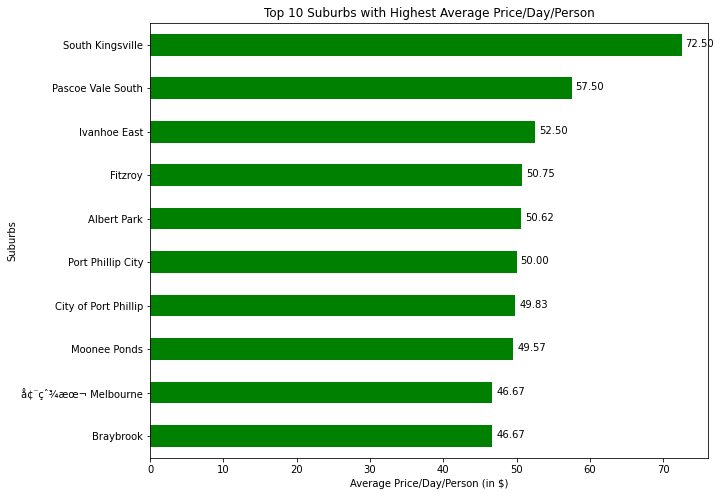

In [35]:
# Plot the top 10 suburbs with highest averageper/day prices.
bplot=grouped_top.plot(kind="barh",figsize=(10,8),color="green")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Top 10 Suburbs with Highest Average Price/Day/Person")
for b in bplot.patches:
    width = b.get_width()
    plt.text(2.5+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [36]:
## Print Output Data.

# convert top10 dataseries to a Dataframe
grouped_top_DF=pd.DataFrame(grouped_top)
grouped_top_DF.reset_index(level=0, inplace=True)
grouped_top_DF

print("Top 10 Suburbs with Highest Average Price/Day/Person for renting out Entire Apartments are : ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=grouped_top_DF.iloc[i,0]
    suburb_price=round(grouped_top_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average price/day/person of ${suburb_price}")

Top 10 Suburbs with Highest Average Price/Day/Person for renting out Entire Apartments are : 
-----------------------------------------
Braybrook has an average price/day/person of $47.0
å¢¨çˆ¾æœ¬ Melbourne has an average price/day/person of $47.0
Moonee Ponds has an average price/day/person of $50.0
City of Port Phillip has an average price/day/person of $50.0
Port Phillip City has an average price/day/person of $50.0
Albert Park has an average price/day/person of $51.0
Fitzroy has an average price/day/person of $51.0
Ivanhoe East has an average price/day/person of $52.0
Pascoe Vale South has an average price/day/person of $58.0
South Kingsville has an average price/day/person of $72.0


In [37]:
## BOTTOM 10 Suburbs
# Grouping apartments accomodating small groupsizes of 2-6 based on suburbs, find average price/day and get top 10 suburbs.
grouped_bottom = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].mean().sort_values().head(10)
grouped_bottom

Suburbs
Keilor East       12.860000
Hadfield          15.000000
Reservoir         23.333333
Maidstone         25.140000
West Footscray    25.816667
Eaglemont         26.330000
Brighton East     26.653333
Rosanna           26.750000
Airport West      27.250000
Kew East          28.000000
Name: Price/Day/Person($), dtype: float64

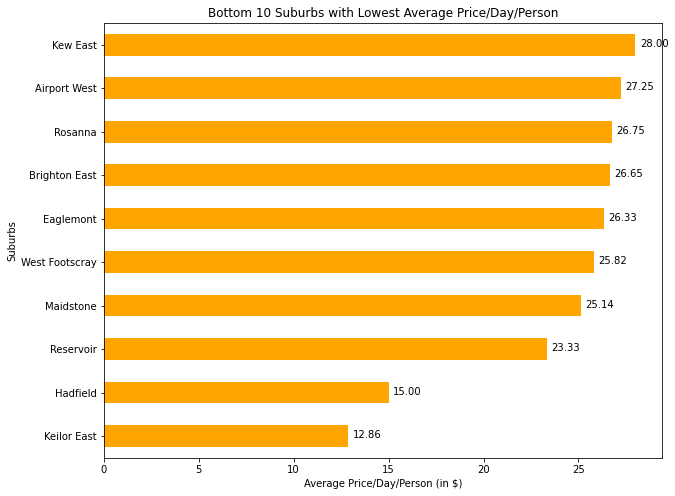

In [38]:
# Plot the bottom 10 suburbs with lowest averageper/day prices.
bplot2=grouped_bottom.plot(kind="barh",figsize=(10,8),color="orange")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Bottom 10 Suburbs with Lowest Average Price/Day/Person")
for b in bplot2.patches:
    width = b.get_width()
    plt.text(1+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [39]:
## Print Output Data.

# convert bottom 10 dataseries to a Dataframe
grouped_bottom_DF=pd.DataFrame(grouped_bottom)
grouped_bottom_DF.reset_index(level=0, inplace=True)
grouped_bottom_DF

print("Top 10 Suburbs with Lowest Average Price/Day/Person (Entire Apartments accomodating 2-6 guests only) are : ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=grouped_bottom_DF.iloc[i,0]
    suburb_price=round(grouped_bottom_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average Price/Day/Person of ${suburb_price}")

Top 10 Suburbs with Lowest Average Price/Day/Person (Entire Apartments accomodating 2-6 guests only) are : 
-----------------------------------------
Keilor East has an average Price/Day/Person of $13.0
Hadfield has an average Price/Day/Person of $15.0
Reservoir has an average Price/Day/Person of $23.0
Maidstone has an average Price/Day/Person of $25.0
West Footscray has an average Price/Day/Person of $26.0
Eaglemont has an average Price/Day/Person of $26.0
Brighton East has an average Price/Day/Person of $27.0
Rosanna has an average Price/Day/Person of $27.0
Airport West has an average Price/Day/Person of $27.0
Kew East has an average Price/Day/Person of $28.0


### FOR EXPLANATION ONLY

#Checking if median yeilds similar results.
#apt_acc_grouped_med = apt_acc_grouped.groupby(["Suburbs"]).median()
#apt_acc_grouped2_med

#Checking if median yeilds similar results.Note: Indeed getting similar ratings
#topsuburbs_med = apt_acc_grouped2_med.sort_values("Price/Day($)",ascending=False)
#topsuburbs_med.head(10)

### Price/Day based on Property_Type 

In [40]:
price_data_cleaned.head()

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
0,St Kilda,Apartment,3,159,53.0
1,Richmond,Apartment,2,98,49.0
2,St Kilda,Apartment,4,190,47.5
3,Melbourne,Loft,4,228,57.0
4,Richmond,Apartment,4,138,34.5


In [41]:
# Groupby on propert types and find the mean price/day/person for each type.
grouped_property_type = price_data_cleaned.groupby('property_type')["Price/Day/Person($)"].mean().sort_values()
grouped_property_type

property_type
Townhouse             43.436658
Apartment             44.377391
House                 45.708771
Loft                  51.321040
Serviced apartment    58.848679
Name: Price/Day/Person($), dtype: float64

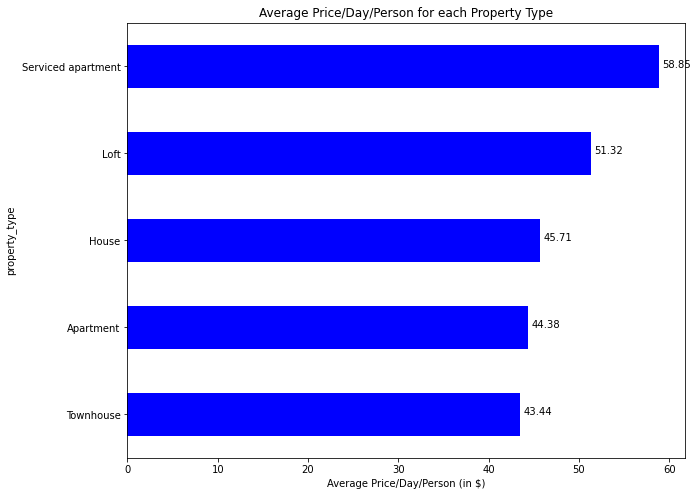

In [42]:
# Plot the average price/day/person based on propert_type.
bplot3=grouped_property_type.plot(kind="barh",figsize=(10,8),color="blue")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Average Price/Day/Person for each Property Type")
for b in bplot3.patches:
    width = b.get_width()
    plt.text(2+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [43]:
# Checking for results if median value is taken for calculation, will the results change.
#grouped_suburb2 = suburb_analysis_df.groupby(['Suburbs']).median()
#grouped_suburb2

In [44]:
# Checking if choosing median changes the results. 
#sorted_topsuburbs2 = grouped_suburb2.sort_values("Price/Day($)",ascending=False)
#sorted_topsuburbs2.head(10)